# Final Project Submission

Please fill out:
* Student name: BRITTA BETTENDORF
* Student pace: FULL TIME
* Scheduled project review date/time: Monday, January 14, 2019, 3pm
* Instructor name: RAFAEL CARRASCO
* Blog post URL: www.datenlage.blog/2019/01/10/classification/

# Predicting votes in relation to a basic income

### The dataset
This study on basic income across Europe was conducted by Dalia Research in April 2016 across 28 EU member states. The sample of n = 9.649 was drawn across all 28 states, taking into account current population distributions with regard to age (14-65 years), gender and region/country. The dataset is available on kaggle: https://www.kaggle.com/daliaresearch/basic-income-survey-european-dataset/home

The dataset contains **9649 records and 15 columns**, these include demographics such as age, gender, education etc. as well as opinions towards the effect of a basic income on someone's work choices, the familiarity with this idea, convincing arguments pro and con - and of course the approval for or rejection of a basic income.

Our **target** in this notebook is **to predict how people are likely to vote**. The target variable originally consisted of multiple classe, however it was converted to a binary outcome. Thus we have a typical classification task to solve. **Several different classification models such as Logistic Regression, Decision Tree, Random Forest, XGBoost and Support Vector Machine (SVM)** are built, optimized, evaluated and compared.

### The OSEMiN-approach

The OSEMiN Process is an acronym that rhymes with “awesome” and stands for **Obtain, Scrub, Explore, Model, and iNterpret**. It can be used as a blueprint for working on data problems using machine learning tools. Scrubbing (also named cleaning) and exploring the data is the whole process of preprocessing. Building the model and of course evaluating and optimizing it is the process of machine learning.

# Table of contents
<a id='Table of contents'></a>

### <a href='#1. Obtaining and viewing the data'>1. Obtaining and viewing the data</a>

### <a href='#2. Preprocessing the data'>2. Preprocessing the data</a>

* <a href='#2.1. Renaming columns'>2.1. Renaming columns</a>
* <a href='#2.2. Excluding unrelated data'>2.2. Excluding unrelated data</a>
* <a href='#2.3. Dealing with misleading data'>2.3. Dealing with misleading data</a>
* <a href='#2.4. Dealing with missing data'>2.4. Dealing with missing data</a>
* <a href='#2.5. Dealing with duplicate data'>2.5. Dealing with duplicate data</a>
* <a href='#2.6. Basic feature extraction and engineering'>2.6. Basic feature extraction and engineering</a>

### <a href='#3. Data visualization'>3. Data visualization</a>
* <a href='#3.1. Mosaic Plots'>3.1. Mosaic Plots</a>
* <a href='#3.2. Bar Charts'>3.2. Bar Charts</a>

### <a href='#4. Machine Learning'>4. Machine Learning</a>

* <a href='#4.1. Recoding categorical features'>4.1. Recoding categorical features</a>
* <a href='#4.2. Training a Logistic Regression'>4.2. Training a Logistic Regression</a>
* <a href='#4.3. Training a Random Forest Classifier'>4.3. Training a Random Forest Classifier</a>
* <a href='#4.4. Training an XGBoost Classifier'>4.4. Training an XGBoost Classifier</a>
* <a href='#4.5. Training a Support Vector Machine'>4.5. Training a Support Vector Machine</a>
* <a href='#4.6. Model comparison'>4.6. Model comparison</a>
* <a href='#4.7. Balancing the data'>4.7. Balancing the data</a>
* <a href='#4.8. Model comparison II'>4.8. Model comparison II</a>

### <a href='#5. Conclusions'>5. Conclusions</a>
* <a href='#5.1. Feature importance'>5.1. Feature importance</a>
* <a href='#5.2. Recommendation'>5.2. Recommendation</a>

### 1. Obtaining and viewing the data
<a id='1. Obtaining and viewing the data'></a>

Let's start by obtaining and investigating the pandas DataFrame:

In [1]:
import xgboost as xgb

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
from pprint import pprint

In [2]:
# reading in dataset and viewing it
df = pd.read_csv('basic_income_dataset_dalia.csv')
df.head()

,country_code,uuid,age,gender,rural,dem_education_level,dem_full_time_job,dem_has_children,question_bbi_2016wave4_basicincome_awareness,question_bbi_2016wave4_basicincome_vote,question_bbi_2016wave4_basicincome_effect,question_bbi_2016wave4_basicincome_argumentsfor,question_bbi_2016wave4_basicincome_argumentsagainst,age_group,weight
0,AT,f6e7ee00-deac-0133-4de8-0a81e8b09a82,61,male,rural,no,no,no,I know something about it,I would not vote,None of the above,None of the above,None of the above,40_65,1.105.534.474
1,AT,54f0f1c0-dda1-0133-a559-0a81e8b09a82,57,male,urban,high,yes,yes,I understand it fully,I would probably vote for it,A basic income would not affect my work choices,It increases appreciation for household work a...,It might encourage people to stop working,40_65,1.533.248.826
2,AT,83127080-da3d-0133-c74f-0a81e8b09a82,32,male,urban,NaN,no,no,I have heard just a little about it,I would not vote,‰Û_ gain additional skills,It creates more equality of opportunity,Foreigners might come to my country and take a...,26_39,0.9775919155
3,AT,15626d40-db13-0133-ea5c-0a81e8b09a82,45,male,rural,high,yes,yes,I have heard just a little about it,I would probably vote for it,‰Û_ work less,It reduces anxiety about financing basic needs,None of the above,40_65,1.105.534.474
4,AT,24954a70-db98-0133-4a64-0a81e8b09a82,41,female,urban,high,yes,yes,I have heard just a little about it,I would probably vote for it,None of the above,It reduces anxiety about financing basic needs,It is impossible to finance | It might encoura...,40_65,58.731.136


In [3]:
# get the number of rows and columns
print(df.shape)

# get datetype info
print()
print(df.info())

(9649, 15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9649 entries, 0 to 9648
Data columns (total 15 columns):
country_code                                           9649 non-null object
uuid                                                   9649 non-null object
age                                                    9649 non-null int64
gender                                                 9649 non-null object
rural                                                  9649 non-null object
dem_education_level                                    8986 non-null object
dem_full_time_job                                      9649 non-null object
dem_has_children                                       9649 non-null object
question_bbi_2016wave4_basicincome_awareness           9649 non-null object
question_bbi_2016wave4_basicincome_vote                9649 non-null object
question_bbi_2016wave4_basicincome_effect              9649 non-null object
question_bbi_2016wave4_basicincome_argumentsfo

In [4]:
# get an overview of the numeric agecolumn (.T = transposing the dataframe's order)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,9649.0,37.712716,12.27063,14.0,28.0,40.0,46.0,65.0


In [5]:
# get an overview of all 14 object columns/features
df.describe(include='object').T

,count,unique,top,freq
country_code,9649,28,DE,1420
uuid,9649,9649,6eff8b00-d965-0133-f5d5-0a81e8b09a82,1
gender,9649,2,male,5094
rural,9649,2,urban,6878
dem_education_level,8986,4,medium,3578
dem_full_time_job,9649,2,yes,5702
dem_has_children,9649,2,yes,5049
question_bbi_2016wave4_basicincome_awareness,9649,4,I know something about it,3389
question_bbi_2016wave4_basicincome_vote,9649,5,I would probably vote for it,3272
question_bbi_2016wave4_basicincome_effect,9649,9,A basic income would not affect my work choices,3349


*Back to: <a href='#Table of contents'> Table of contents</a>*
### 2. Preprocessing the data
<a id='2. Preprocessing the data'></a>

#### 2.1. Renaming columns 
<a id='2.1. Renaming columns'></a>

The column labels are quite wordy. Let's change that:

In [6]:
df.rename(columns = {'rural':'city_or_rural',
                     'dem_education_level':'education',
                     'dem_full_time_job':'full_time_job',
                     'dem_has_children':'has_children',
                     'question_bbi_2016wave4_basicincome_awareness':'awareness',
                     'question_bbi_2016wave4_basicincome_vote':'vote',
                     'question_bbi_2016wave4_basicincome_effect':'effect',
                     'question_bbi_2016wave4_basicincome_argumentsfor':'arg_for',
                     'question_bbi_2016wave4_basicincome_argumentsagainst':'arg_against'},
          inplace=True)

#### 2.2. Excluding unrelated data
<a id='2.2. Excluding unrelated data'></a>

Again, our target is to predict how people are likely to vote. Hence, features should be included only if they're suspected to be related to the target variable. Insofar as the goal of supervised classification is to predict the target, features that obviously have nothing to do with the target should be excluded.

Both variables the **uuid** and the **weight** (given to obtain census representative results) are irrelevant for our classification task here. As we want to construct our own age groups later, we will also drop the predefined **age group**:

In [7]:
df.drop(['uuid', 'weight', 'age_group'], axis=1, inplace=True)

In [8]:
# new number of rows and columns
df.shape

(9649, 12)

#### 2.3. Dealing with misleading data
<a id='2.3. Dealing with misleading data'></a>

All data make perfectly sense, there is nothing to correct.

#### 2.4. Dealing with missing data
<a id='2.4. Dealing with missing data'></a>

In [9]:
# checking how much missing data we have in total
df.isna().sum()

country_code       0
age                0
gender             0
city_or_rural      0
education        663
full_time_job      0
has_children       0
awareness          0
vote               0
effect             0
arg_for            0
arg_against        0
dtype: int64

In [10]:
# in percentage: 7%
round(df['education'].isna().sum() / len(df), 3)

0.069

In [11]:
df.education.unique()

array(['no', 'high', nan, 'medium', 'low'], dtype=object)

In [12]:
df.education.value_counts()

medium    3578
high      3270
low       1815
no         323
Name: education, dtype: int64

We talk about 663 missing values - that is of no small concern! I'm pretty sure that these records are mostly people with **no** formal education who might be ashamed of revealing this or thought this would be the right answer. So I decide to fill the NaN's with the **no formal education**:

In [13]:
df['education'].fillna('no', inplace=True)

In [14]:
df.isna().sum().sum()

0

In [15]:
df.education.value_counts()

medium    3578
high      3270
low       1815
no         986
Name: education, dtype: int64

In [16]:
# new number of rows and columns
df.shape

(9649, 12)

#### 2.5. Dealing with duplicate data
<a id='2.5. Dealing with duplicate data'></a>

In [17]:
# check if there are any duplicates
df.duplicated().sum()

29

Indeed, we have some duplicates, so let's drop them:

In [18]:
df.drop_duplicates(keep='first', inplace=True)

In [19]:
# final number of rows and columns
df.shape

(9620, 12)

#### 2.6. Basic feature extraction and engineering
<a id='2.6. Basic feature extraction and engineering'></a>

1. Someone who "probably votes for" the basic income, votes the same way, namely with "yes", as someone who "votes for it". The same holds for rejection. Our target first and foremost is to predict whether someone is for or against basic income, we're not so much interested in predicting someone who has no opinion and/or won't vote. So let's **simplify our target** and recode the answers and drop all records that won't take any clear action:

In [20]:
# recode voting
def vote_coding(row):
    if row == 'I would vote for it' : return('for')
    elif row == 'I would probably vote for it': return('for')
    elif row == 'I would vote against it': return('against')
    elif row == 'I would probably vote against it': return('against')
    elif row == 'I would not vote': return('no_action')

# apply function
df['vote'] = df['vote'].apply(vote_coding)

In [21]:
# drop all records who are not "for" or "against"
df = df.query("vote != 'no_action'")

In [22]:
df.vote.value_counts(normalize=True)

for        0.716917
against    0.283083
Name: vote, dtype: float64

2. Another two columns, **"awareness" and "effect"**, contain whole sentences that need to be shortened to one word to then be ultimately ready for being processed later:

In [23]:
def awareness_coding(row):
    if row == 'I understand it fully': return('fully')
    elif row == 'I know something about it': return('something')
    elif row == 'I have heard just a little about it': return('little')
    elif row == 'I have never heard of it': return('nothing')

df['awareness'] = df['awareness'].apply(awareness_coding)

In [24]:
def effect_coding(row):
    if row == '‰Û_ stop working': return('stop_working')
    elif row == '‰Û_ work less': return('work_less')
    elif row == '‰Û_ do more volunteering work': return('volunteering_work')
    elif row == '‰Û_ spend more time with my family': return('more_family_time')
    elif row == '‰Û_ look for a different job': return('different_job')
    elif row == '‰Û_ work as a freelancer': return('freelancer')
    elif row == '‰Û_ gain additional skills': return('additional_skills')
    elif row == 'A basic income would not affect my work choices': return('no_effect')
    else: return('none_of_the_above')
    
df['effect'] = df['effect'].apply(effect_coding).astype(str)

3. Next, let's build **new age groups** according to the 0.2 percentiles and then drop the numeric "age" column:

In [25]:
df.age.describe(percentiles=[.2, .4, .6, .8])

count    8471.000000
mean       38.111439
std        12.139920
min        14.000000
20%        26.000000
40%        35.000000
50%        40.000000
60%        42.000000
80%        49.000000
max        65.000000
Name: age, dtype: float64

In [26]:
def age_groups(row):
    if row <= 26: return('14_26')
    elif row <= 35: return('27_35')
    elif row <= 42: return('36_42')
    elif row <= 49: return('43_49')
    else: return('above_50')
    
df['age_group'] = df['age'].apply(age_groups)
df.drop(['age'], axis=1, inplace=True)

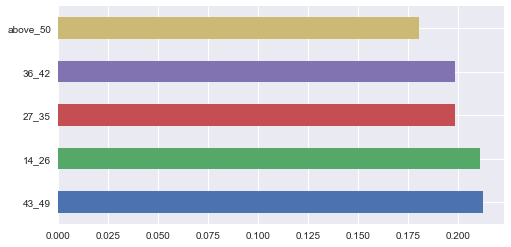

In [27]:
df['age_group'].value_counts(normalize=True).plot(kind='barh', figsize=(8,4));

4. Lastly, let's extract the **2 or 3 most mentioned arguments PRO** and the **2 or 3 most mentioned arguments CONTRA** a basic income and build new columns with boolean values:

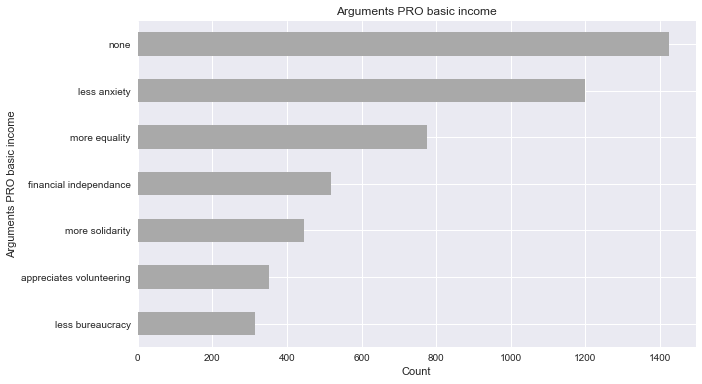

In [28]:
arg_for = ['It reduces anxiety about financing basic needs',
           'It creates more equality of opportunity',
           'It encourages financial independence and self-responsibility',
           'It increases solidarity, because it is funded by everyone',
           'It reduces bureaucracy and administrative expenses',
           'It increases appreciation for household work and volunteering',
           'None of the above']

# count all arguments
counter = [0,0,0,0,0,0,0]

for row in df.iterrows():
    for i in range(0, len(arg_for)):
        if arg_for[i] in row[1]['arg_for'].split('|'):
            counter[i] = counter[i] + 1

# create a new dictionary 
dict_keys = ['less anxiety', 'more equality', 'financial independance', 
             'more solidarity', 'less bureaucracy', 'appreciates volunteering', 'none']

arg_dict = {}

for i in range(0, len(arg_for)):
    arg_dict[dict_keys[i]] = counter[i]

# sub-df for counted arguments
sub_df = pd.DataFrame(list(arg_dict.items()), columns=['Arguments PRO basic income', 'count'])

# plotting
sub_df.sort_values(by=['count'], ascending=True).plot(kind='barh', x='Arguments PRO basic income', y='count',  
                                                      figsize=(10,6), legend=False, color='darkgrey',
                                                      title='Arguments PRO basic income')
plt.xlabel('Count'); 

In [29]:
df['less_anxiety'] = df['arg_for'].str.contains('anxiety')
df['more_equality'] = df['arg_for'].str.contains('equality')

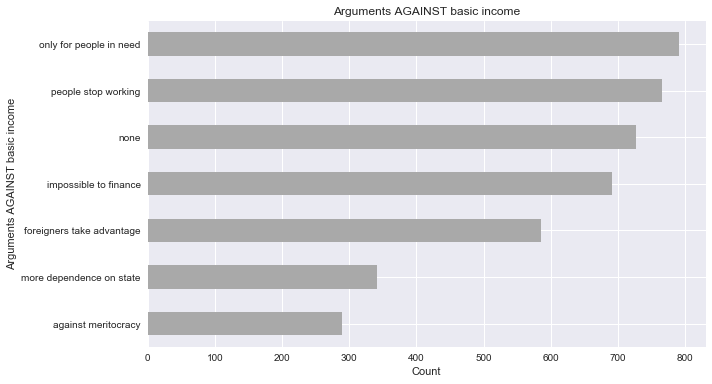

In [30]:
arg_against = ['It is impossible to finance', 'It might encourage people to stop working',
               'Foreigners might come to my country and take advantage of the benefit',
               'It is against the principle of linking merit and reward', 
               'Only the people who need it most should get something from the state',
               'It increases dependence on the state', 'None of the above']

# count all arguments
counter = [0,0,0,0,0,0,0]

for row in df.iterrows():
    for i in range(0, len(arg_against)):
        if arg_against[i] in row[1]['arg_against'].split('|'):
            counter[i] = counter[i] + 1

# create a new dictionary 
dict_keys = ['impossible to finance', 'people stop working', 'foreigners take advantage', 
             'against meritocracy', 'only for people in need', 'more dependence on state', 'none']

arg_dict = {}

for i in range(0, len(arg_against)):
    arg_dict[dict_keys[i]] = counter[i]

# sub-df for counted arguments
sub_df = pd.DataFrame(list(arg_dict.items()), columns=['Arguments AGAINST basic income', 'count'])

# plotting
sub_df.sort_values(by=['count'], ascending=True).plot(kind='barh', x='Arguments AGAINST basic income', y='count',  
                                                      figsize=(10,6), legend=False, color='darkgrey',
                                                      title='Arguments AGAINST basic income')
plt.xlabel('Count'); 

In [31]:
df['in_need'] = df['arg_against'].str.contains('need')
df['stop_working'] = df['arg_against'].str.contains('stop working')
df['too_costly'] = df['arg_against'].str.contains('impossible')

In [32]:
df.drop(['arg_for', 'arg_against'], axis=1, inplace=True)

In [33]:
df.head()

,country_code,gender,city_or_rural,education,full_time_job,has_children,awareness,vote,effect,age_group,less_anxiety,more_equality,in_need,stop_working,too_costly
1,AT,male,urban,high,yes,yes,fully,for,no_effect,above_50,True,False,False,True,False
3,AT,male,rural,high,yes,yes,little,for,work_less,43_49,True,False,False,False,False
4,AT,female,urban,high,yes,yes,little,for,none_of_the_above,36_42,True,False,False,True,True
5,AT,female,rural,high,yes,no,fully,against,no_effect,14_26,True,False,False,True,True
6,AT,female,urban,medium,no,no,something,for,freelancer,14_26,True,False,False,True,False


In [34]:
df.shape

(8471, 15)

*Back to: <a href='#Table of contents'> Table of contents</a>*
### 3. Data visualization
<a id='3. Data visualization'></a>

Between preprocessing and model buildung lies the important step of data visualization. It serves as a sanity check of the features and target and may help explore the relationship between both, which will guide us in model building and assist us in our understanding of the model and predictions. The target is what we are asked to predict: either a "yes" to basic income or a "no" or indifference. 

**We should first examine the number of votes falling into each category.**

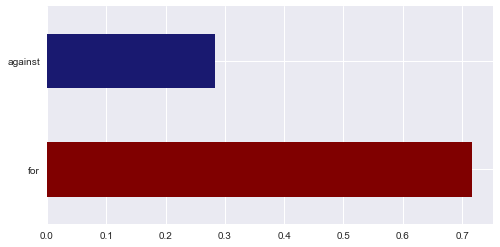

In [35]:
df['vote'].value_counts(normalize=True).plot(kind='barh', figsize=(8,4), 
                                             color=['maroon','midnightblue']);

By looking at the number of records we have for each class, we see that we have roughly 70% voting for a basic income vs. 30% against.

#### 3.1. Mosaic Plots
<a id='3.1. Mosaic Plots'></a>

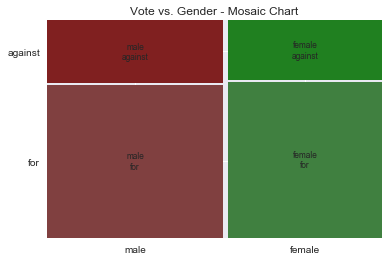

In [36]:
from statsmodels.graphics.mosaicplot import mosaic

mosaic(df, ['gender', 'vote'], gap=0.015, title='Vote vs. Gender - Mosaic Chart');

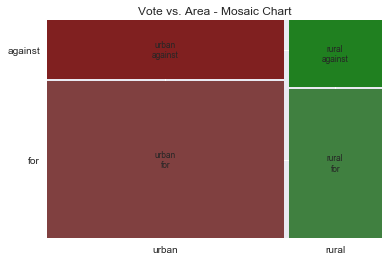

In [37]:
mosaic(df, ['city_or_rural', 'vote'], gap=0.015, title='Vote vs. Area - Mosaic Chart');

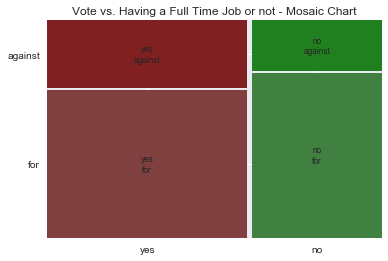

In [38]:
mosaic(df, ['full_time_job', 'vote'], gap=0.015, 
       title='Vote vs. Having a Full Time Job or not - Mosaic Chart');

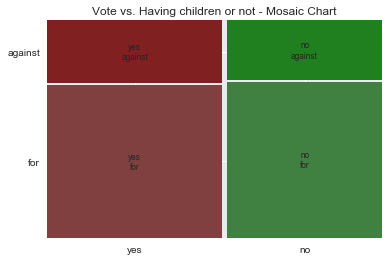

In [39]:
mosaic(df, ['has_children', 'vote'], gap=0.015, 
       title='Vote vs. Having children or not - Mosaic Chart');

#### 3.2. Bar Charts
<a id='3.2. Bar Charts'></a>

##### Vote and Full Time Job

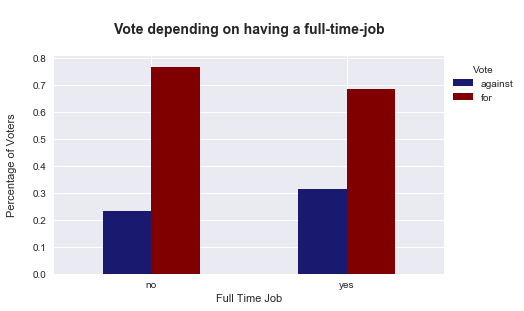

In [40]:
# Votes depending on having a full-time-job

sub_df = df.groupby('full_time_job')['vote'].value_counts(normalize=True).unstack()
sub_df.plot(kind='bar', color=['midnightblue', 'maroon'], figsize=(7,4))
plt.xlabel("Full Time Job")
plt.xticks(rotation=0)
plt.ylabel("Percentage of Voters\n")
plt.title('\nVote depending on having a full-time-job\n', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.2, 1.0), title='Vote');

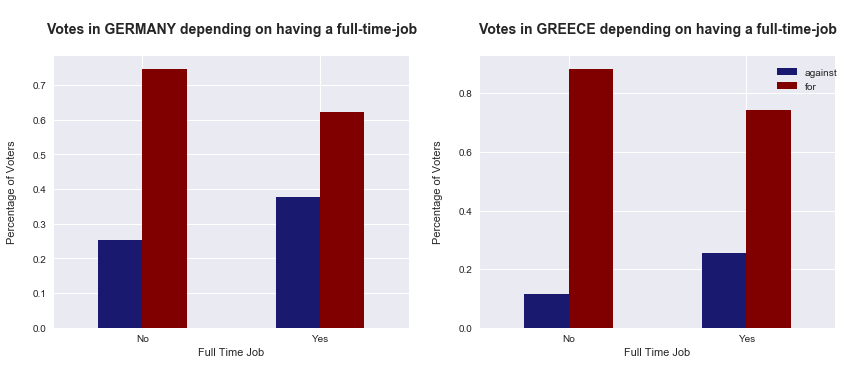

In [41]:
# Votes in GERMANY and GREECE - depending on having a full-time-job

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))

# creating sub-df for Germany
sub_df_1 = df[df['country_code']=='DE'].groupby('full_time_job')['vote'].value_counts(normalize=True).unstack()
sub_df_1.plot(kind='bar', color = ['midnightblue', 'maroon'], ax=ax1, legend=False)
ax1.set_title('\nVotes in GERMANY depending on having a full-time-job\n', fontsize=14, fontweight='bold')
ax1.set_xlabel("Full Time Job")
ax1.set_xticklabels(labels=['No', 'Yes'], rotation=0)
ax1.set_ylabel("Percentage of Voters\n")

# creating sub-df for Greece
sub_df_2 = df[df['country_code']=='GR'].groupby('full_time_job')['vote'].value_counts(normalize=True).unstack()
sub_df_2.plot(kind='bar', color = ['midnightblue', 'maroon'], ax=ax2, legend=False)
ax2.set_title('\nVotes in GREECE depending on having a full-time-job\n', fontsize=14, fontweight='bold')
ax2.set_xlabel("Full Time Job")
ax2.set_xticklabels(labels=['No', 'Yes'], rotation=0)
ax2.set_ylabel("Percentage of Voters\n")

# create one legend
handles, labels = ax2.get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(0.84, 0.85))
plt.show();

##### Vote and Education Level

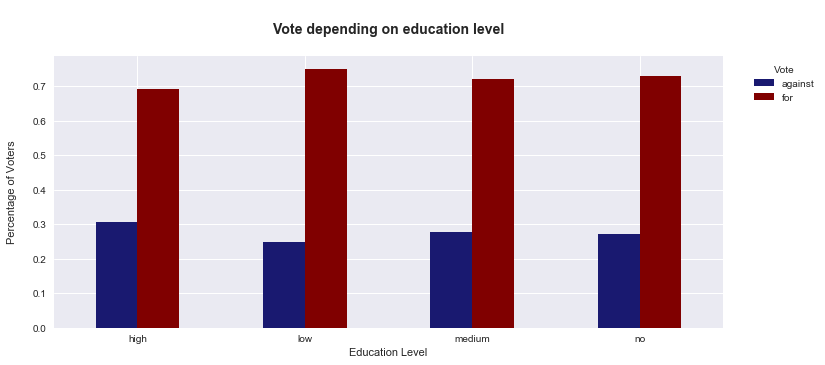

In [42]:
# Plotting vote depending on education level

sub_df = df.groupby('education')['vote'].value_counts(normalize=True).unstack()
sub_df.plot(kind='bar', color = ['midnightblue','maroon'], figsize=(12,5))
plt.xlabel("Education Level")
plt.xticks(rotation=0)
plt.ylabel("Percentage of Voters\n")
plt.title('\nVote depending on education level\n', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.15, 1), title='Vote');

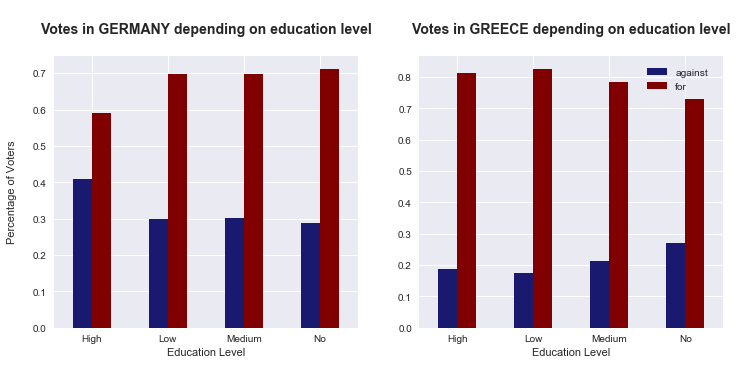

In [45]:
# Plotting votes in GERMANY and GREECE - depending on education level

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

# creating sub-df for Germany
sub_df_1 = df[df['country_code']=='DE'].groupby('education')['vote'].value_counts(normalize=True).unstack()
sub_df_1.plot(kind='bar', color = ['midnightblue', 'maroon'], ax=ax1, legend=False)
ax1.set_title('\nVotes in GERMANY depending on education level\n', fontsize=14, fontweight='bold')
ax1.set_xlabel("Education Level")
ax1.set_xticklabels(labels=['High', 'Low', 'Medium', 'No'], rotation=0)
ax1.set_ylabel("Percentage of Voters\n")

# creating df for Greece
sub_df_2 = df[df['country_code']=='GR'].groupby('education')['vote'].value_counts(normalize=True).unstack()
sub_df_2.plot(kind='bar', color = ['midnightblue', 'maroon'], ax=ax2, legend=False)
ax2.set_title('\nVotes in GREECE depending on education level\n', fontsize=14, fontweight='bold')
ax2.set_xlabel("Education Level")
ax2.set_xticklabels(labels=['High', 'Low', 'Medium', 'No'], rotation=0)

# create one legend
handles, labels = ax2.get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(0.83, 0.85))
plt.show();

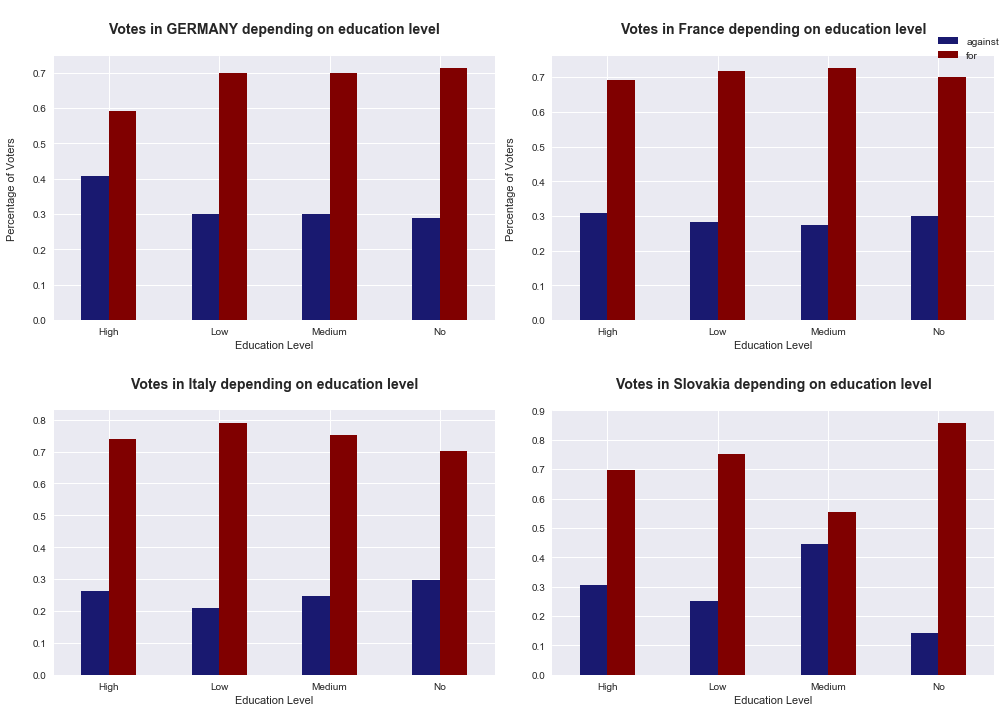

In [46]:
# Plotting votes in 4 countries - depending on education level

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14,10))

# creating sub-df for Germany
sub_df_1 = df[df['country_code']=='DE'].groupby('education')['vote'].value_counts(normalize=True).unstack()
sub_df_1.plot(kind='bar', color = ['midnightblue', 'maroon'], ax=ax1, legend=False)
ax1.set_title('\nVotes in GERMANY depending on education level\n', fontsize=14, fontweight='bold')
ax1.set_xlabel("Education Level")
ax1.set_xticklabels(labels=['High', 'Low', 'Medium', 'No'], rotation=0)
ax1.set_ylabel("Percentage of Voters\n")

# creating sub-df for France
sub_df_2 = df[df['country_code']=='FR'].groupby('education')['vote'].value_counts(normalize=True).unstack()
sub_df_2.plot(kind='bar', color = ['midnightblue', 'maroon'], ax=ax2, legend=False)
ax2.set_title('\nVotes in France depending on education level\n', fontsize=14, fontweight='bold')
ax2.set_xlabel("Education Level")
ax2.set_xticklabels(labels=['High', 'Low', 'Medium', 'No'], rotation=0)
ax2.set_ylabel("Percentage of Voters\n")

# creating sub-df for Italy
sub_df_3 = df[df['country_code']=='IT'].groupby('education')['vote'].value_counts(normalize=True).unstack()
sub_df_3.plot(kind='bar', color = ['midnightblue', 'maroon'], ax=ax3, legend=False)
ax3.set_title('\nVotes in Italy depending on education level\n', fontsize=14, fontweight='bold')
ax3.set_xlabel("Education Level")
ax3.set_xticklabels(labels=['High', 'Low', 'Medium', 'No'], rotation=0)

# creating sub-df for Slovakia
sub_df_4 = df[df['country_code']=='SK'].groupby('education')['vote'].value_counts(normalize=True).unstack()
sub_df_4.plot(kind='bar', color = ['midnightblue', 'maroon'], ax=ax4, legend=False)
ax4.set_title('\nVotes in Slovakia depending on education level\n', fontsize=14, fontweight='bold')
ax4.set_xlabel("Education Level")
ax4.set_xticklabels(labels=['High', 'Low', 'Medium', 'No'], rotation=0)

# create only one legend
handles, labels = ax2.get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(1.0, 0.95))
plt.tight_layout()
plt.show();

##### Vote and Awareness

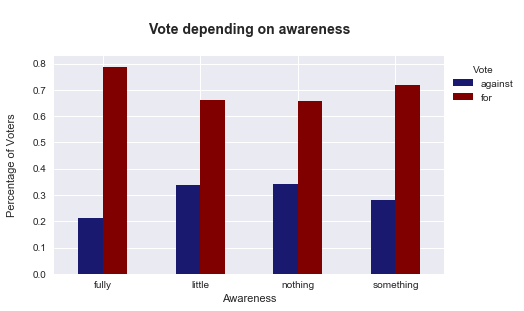

In [47]:
# Votes depending on awareness

sub_df = df.groupby('awareness')['vote'].value_counts(normalize=True).unstack()
sub_df.plot(kind='bar', color=['midnightblue', 'maroon'], figsize=(7,4))
plt.xlabel("Awareness")
plt.xticks(rotation=0)
plt.ylabel("Percentage of Voters\n")
plt.title('\nVote depending on awareness\n', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.2, 1.0), title='Vote');

##### Vote and age group

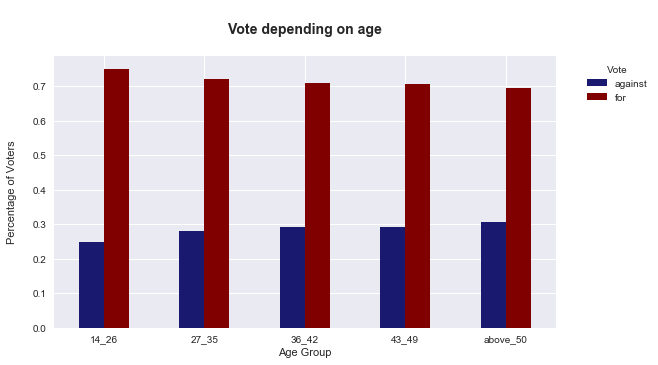

In [48]:
# Votes depending on age

sub_df = df.groupby('age_group')['vote'].value_counts(normalize=True).unstack()
sub_df.plot(kind='bar', color=['midnightblue', 'maroon'], figsize=(9,5))
plt.xlabel("Age Group")
plt.xticks(rotation=0)
plt.ylabel("Percentage of Voters\n")
plt.title('\nVote depending on age\n', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.2, 1.0), title='Vote');

##### Vote and expected effect

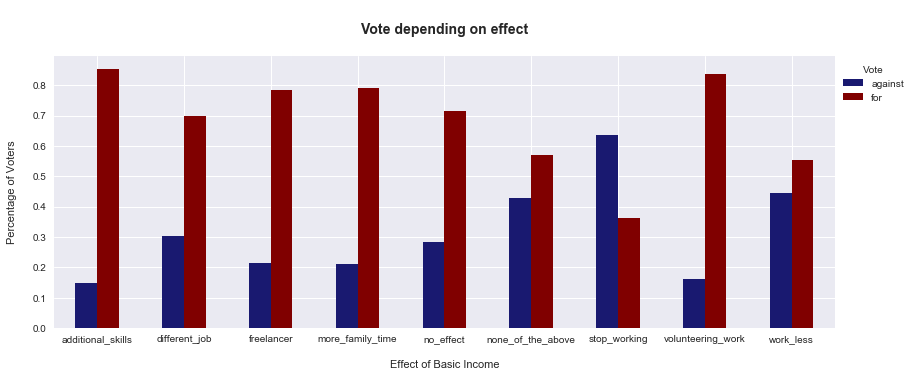

In [49]:
# Votes depending on effect

sub_df = df.groupby('effect')['vote'].value_counts(normalize=True).unstack()
sub_df.plot(kind='bar', color=['midnightblue', 'maroon'], figsize=(14,5))
plt.xlabel("\nEffect of Basic Income")
plt.xticks(rotation=0)
plt.ylabel("Percentage of Voters\n")
plt.title('\nVote depending on effect\n', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.1, 1.0), title='Vote');

##### Vote and arguments

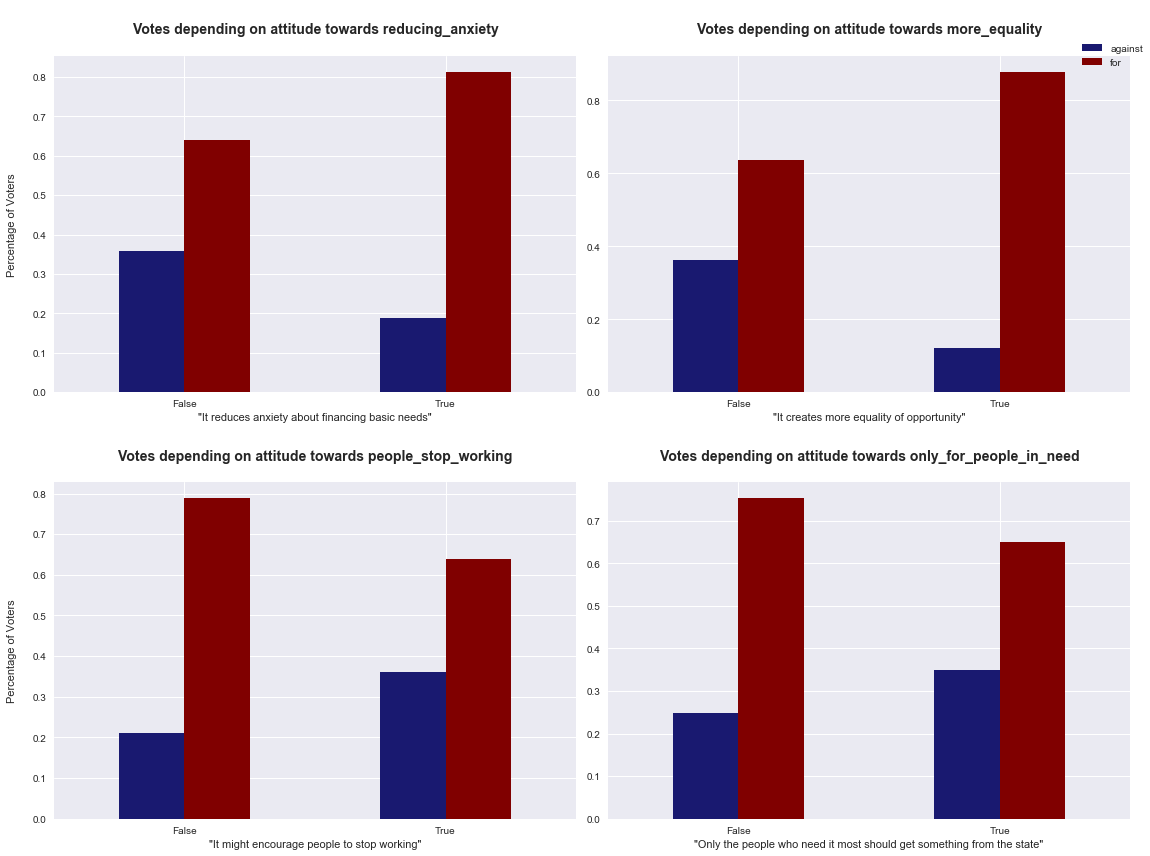

In [50]:
# Plotting votes in 4 countries - depending on education level

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16,12))

# creating sub-df for those who agree/disagree to the argument:
# "It reduces anxiety about financing basic needs"
sub_df_1 = df.groupby('less_anxiety')['vote'].value_counts(normalize=True).unstack()
sub_df_1.plot(kind='bar', color = ['midnightblue', 'maroon'], ax=ax1, legend=False)
ax1.set_title('\nVotes depending on attitude towards reducing_anxiety\n', fontsize=14, fontweight='bold')
ax1.set_xlabel('"It reduces anxiety about financing basic needs"')
ax1.set_xticklabels(labels=['False', 'True'], rotation=0)
ax1.set_ylabel("Percentage of Voters\n")

# creating sub-df for those who agree/disagree to the argument:
# "It creates more equality of opportunity"
sub_df_2 = df.groupby('more_equality')['vote'].value_counts(normalize=True).unstack()
sub_df_2.plot(kind='bar', color = ['midnightblue', 'maroon'], ax=ax2, legend=False)
ax2.set_title('\nVotes depending on attitude towards more_equality\n', fontsize=14, fontweight='bold')
ax2.set_xlabel('"It creates more equality of opportunity"')
ax2.set_xticklabels(labels=['False', 'True'], rotation=0)

# creating sub-df for those who agree/disagree to the argument:
# "It might encourage people to stop working"
sub_df_3 = df.groupby('stop_working')['vote'].value_counts(normalize=True).unstack()
sub_df_3.plot(kind='bar', color = ['midnightblue', 'maroon'], ax=ax3, legend=False)
ax3.set_title('\nVotes depending on attitude towards people_stop_working\n', fontsize=14, fontweight='bold')
ax3.set_xlabel('"It might encourage people to stop working"')
ax3.set_xticklabels(labels=['False', 'True'], rotation=0)
ax3.set_ylabel("Percentage of Voters\n")

# creating sub-df for those who agree/disagree to the argument:
# "Only the people who need it most should get something from the state"
sub_df_4 = df.groupby('in_need')['vote'].value_counts(normalize=True).unstack()
sub_df_4.plot(kind='bar', color = ['midnightblue', 'maroon'], ax=ax4, legend=False)
ax4.set_title('\nVotes depending on attitude towards only_for_people_in_need\n', fontsize=14, fontweight='bold')
ax4.set_xlabel('"Only the people who need it most should get something from the state"')
ax4.set_xticklabels(labels=['False', 'True'], rotation=0)

# create only one legend
handles, labels = ax2.get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(1.0, 0.95))
plt.tight_layout()
plt.show();

*Back to: <a href='#Table of contents'> Table of contents</a>*
### 4. Machine Learning
<a id='4. Machine Learning'></a>

#### 4.1. Recoding categorical features
<a id='4.1. Recoding categorical features'></a>

Machine learning algorithms generally need all data - including categorical data - in numeric form. To satisfy them, categorical features are converted into separate binary features called dummy variables.
Therefore, we have to find a way to represent these variables as numbers before handing them off to the model. One usual way is **One-hot encoding**, which creates a new column for each unique category in a categorical variable. And each observation recieves a 1 in the column for its corresponding category and a 0 in all other new columns. To conduct For one-hot encoding, we use the **pandas get_dummies(df) function.**

In [134]:
# Define our features 
features = df.drop(["vote"], axis=1)

# Define our target
target = df[["vote"]]

# create dummy variables
features = pd.get_dummies(features)

In [135]:
print(features.shape)
features.tail(2)

(8471, 63)


,less_anxiety,more_equality,in_need,stop_working,too_costly,country_code_AT,country_code_BE,country_code_BG,country_code_CY,country_code_CZ,...,effect_no_effect,effect_none_of_the_above,effect_stop_working,effect_volunteering_work,effect_work_less,age_group_14_26,age_group_27_35,age_group_36_42,age_group_43_49,age_group_above_50
9647,True,True,False,False,False,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
9648,False,False,False,True,False,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [136]:
print(target.shape)

(8471, 1)


*Back to: <a href='#Table of contents'> Table of contents</a>*
#### 4.2. Training a Logistic Regression
<a id='4.2. Training a Logistic Regression'></a>

When approaching a supervised learning problem like ours, we should always use multiple algorithms and compare the performances of the various models. Sometimes simplest is best, and so we will start by applying logistic regression. Logistic regression makes use of what's called the logistic function to calculate the odds that a given data point belongs to a given class. Once we have more models, we can compare them on a few performance metrics.

Before we start, let's prepare our work and import all libraries we need for classifying our data:

In [137]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# import metrics
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# suppress all warnings
import warnings
warnings.filterwarnings("ignore")

In [138]:
# Split our data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

In [58]:
# Instantiate the logistic regression
logreg = LogisticRegression()

# Train
logreg.fit(X_train, y_train)

# Predict
train_preds = logreg.predict(X_train)
test_preds = logreg.predict(X_test)

# Evaluate
train_accuracy_logreg = accuracy_score(y_train, train_preds)
test_accuracy_logreg = accuracy_score(y_test, test_preds)
report_logreg = classification_report(y_test, test_preds)

print("Logistic Regression")
print("------------------------")
print(f"Training Accuracy: {(train_accuracy_logreg * 100):.4}%")
print(f"Test Accuracy:     {(test_accuracy_logreg * 100):.4}%")

# store accuracy in a new dataframe
score_logreg = ['Logistic Regression', train_accuracy_logreg, test_accuracy_logreg]
models = pd.DataFrame([score_logreg])

Logistic Regression
------------------------
Training Accuracy: 77.6%
Test Accuracy:     77.88%


#### 4.3. Training a Random Forest Classifier
<a id='4.3. Training a Random Forest Classifier'></a>

Next, let's run a Random Forest Classifier with predefined specifications or "hyperparameters". Some of the important ones to tune for a Random Forest are:

* n_estimators = number of trees
* criterion = splitting criterion (for maximizing the information gain from each split)
* max_features = max number of features considered for splitting a node
* max_depth = max number of levels in each decision tree
* min_samples_split = min samples needed to make a split

In [62]:
# Import random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [64]:
# creating a baseline
forest = RandomForestClassifier()

In [65]:
# Create Grid              
param_grid = {'n_estimators': [80, 100, 120],
              'criterion': ['gini', 'entropy'],
              'max_features': [5, 7, 9],         
              'max_depth': [5, 8, 10], 
              'min_samples_split': [2, 3, 4]}

# Instantiate the tuned random forest
forest_grid_search = GridSearchCV(forest, param_grid, cv=3, n_jobs=-1)

# Train the tuned random forest
forest_grid_search.fit(X_train, y_train)

# print best estimator parameters found during the grid search
print(forest_grid_search.best_params_)

{'criterion': 'gini', 'max_depth': 10, 'max_features': 9, 'min_samples_split': 4, 'n_estimators': 120}


In [66]:
# Instantiate the tuned random forest with the best found parameters
forest = RandomForestClassifier(n_estimators=120, criterion='gini', max_features=9, 
                                max_depth=10, min_samples_split=4, random_state=4)

# Train the random forest
forest.fit(X_train, y_train)

# Predict
train_preds = forest.predict(X_train)
test_preds = forest.predict(X_test)

# Evaluate
train_accuracy_forest = accuracy_score(y_train, train_preds)
test_accuracy_forest = accuracy_score(y_test, test_preds)
report_forest = classification_report(y_test, test_preds)

print("Random Forest")
print("-------------------------")
print(f"Training Accuracy: {(train_accuracy_forest * 100):.4}%")
print(f"Test Accuracy:     {(test_accuracy_forest * 100):.4}%")

# append accuracy score to our dataframe
score_forest = ['Random Forest', train_accuracy_forest, test_accuracy_forest]
models = models.append([score_forest])

Random Forest
-------------------------
Training Accuracy: 80.9%
Test Accuracy:     76.76%


#### 4.4. Training an XGBoost Classifier
<a id='4.4. Training an XGBoost Classifier'></a>

Gradient Boosting is one of the most powerful concepts in machine learning right now. The term Gradient Boosting refers to a class of algorithms rather than any single one. The version with the highest performance right now is XGBoost, which is short for eXtreme Gradient Boosting. XGBoost is a great choice for classification tasks. It provides best-in-class performance compared to other classification algorithms (with the exception of Deep Learning).

Some of the important hyperparameters to tune for an XGBoost are:

* n_estimators = number of trees
* learning_rate = rate at which our model learns patterns in data (After every round, it shrinks the feature weights to reach the best optimum:)
* max_depth = max number of levels in each decision tree
* colsample_bytree = similar to max_features (max number of features considered for splitting a node)
* gamma = specifies the minimum loss reduction required to make a split

In [67]:
# creating a baseline
booster = xgb.XGBClassifier()

In [68]:
# Create Grid
param_grid = {'n_estimators': [100],
              'learning_rate': [0.05, 0.1], 
              'max_depth': [3, 5, 10],
              'colsample_bytree': [0.7, 1],
              'gamma': [0.0, 0.1, 0.2]}

# Instantiate the tuned random forest
booster_grid_search = GridSearchCV(booster, param_grid, scoring='accuracy', cv=3, n_jobs=-1)

# Train the tuned random forest
booster_grid_search.fit(X_train, y_train)

# print best estimator parameters found during the grid search
print(booster_grid_search.best_params_)

{'colsample_bytree': 0.7, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}


In [69]:
# Instantiate tuned xgboost
booster = xgb.XGBClassifier(learning_rate=0.1, max_depth=5, n_estimators=100,
                            colsample_bytree=0.7, gamma=0.1, random_state=4)

# Train
booster.fit(X_train, y_train)

# Predict
train_preds = booster.predict(X_train)
test_preds = booster.predict(X_test)

# Evaluate
train_accuracy_booster = accuracy_score(y_train, train_preds)
test_accuracy_booster = accuracy_score(y_test, test_preds)
report_booster = classification_report(y_test, test_preds)

print("XGBoost")
print("-------------------------")
print(f"Training Accuracy: {(train_accuracy_booster * 100):.4}%")
print(f"Test Accuracy:     {(test_accuracy_booster * 100):.4}%")

# append accuracy score to our dataframe
score_booster = ['XGBoost', train_accuracy_booster, test_accuracy_booster]
models = models.append([score_booster])

XGBoost
-------------------------
Training Accuracy: 81.6%
Test Accuracy:     77.99%


#### 4.5. Training a Support Vector Machine
<a id='4.5. Training a Support Vector Machine'></a>

Another fast and popular classification technique is: Support Vector Machines (also referred to as SVMs). The idea behind SVMs is that we perform classification by finding the seperation line or "hyperplane" that best differates between two classes.

In [70]:
from sklearn import svm

In [71]:
# instantiate Support Vector Classification
svm = svm.SVC(kernel='rbf', random_state=4)

# Train
svm.fit(X_train, y_train)

# Predict
train_preds = svm.predict(X_train)
test_preds = svm.predict(X_test)

# Evaluate
train_accuracy_svm = accuracy_score(y_train, train_preds)
test_accuracy_svm = accuracy_score(y_test, test_preds)
report_svm = classification_report(y_test, test_preds)

print("Support Vector Machine")
print("-------------------------")
print(f"Training Accuracy: {(train_accuracy_svm * 100):.4}%")
print(f"Test Accuracy:     {(test_accuracy_svm * 100):.4}%")

# append accuracy score to our dataframe
score_svm = ['Support Vector Machine', train_accuracy_svm, test_accuracy_svm]
models = models.append([score_svm])

Support Vector Machine
-------------------------
Training Accuracy: 77.94%
Test Accuracy:     77.46%


*Back to: <a href='#Table of contents'> Table of contents</a>*
#### 4.6. Model comparison
<a id='4.6. Model comparison'></a>

Now that we run several models, let's check the testing accuracy we built on the go and the classification reports:

In [72]:
models

,0,1,2
0,Logistic Regression,0.775974,0.778761
0,Random Forest,0.809032,0.767552
0,XGBoost,0.815968,0.779941
0,Support Vector Machine,0.779368,0.774631


In [73]:
models.columns = ['Classifier', 'Training Accuracy', "Testing Accuracy"]
models.set_index(['Classifier'], inplace=True)
# sort by testing accuracy
models.sort_values(['Testing Accuracy'], ascending=[False])

,Training Accuracy,Testing Accuracy
Classifier,,
XGBoost,0.815968,0.779941
Logistic Regression,0.775974,0.778761
Support Vector Machine,0.779368,0.774631
Random Forest,0.809032,0.767552


In [74]:
print('Classification Report XGBoost: \n', report_booster)
print('------------------------------------------------------')
print('Classification Report Logistic Regression: \n', report_logreg)
print('------------------------------------------------------')
print('Classification Report SVM: \n', report_svm)
print('------------------------------------------------------')
print('Classification Report Random Forest: \n', report_forest)

Classification Report XGBoost: 
               precision    recall  f1-score   support

     against       0.68      0.40      0.50       472
         for       0.80      0.93      0.86      1223

   micro avg       0.78      0.78      0.78      1695
   macro avg       0.74      0.66      0.68      1695
weighted avg       0.77      0.78      0.76      1695

------------------------------------------------------
Classification Report Logistic Regression: 
               precision    recall  f1-score   support

     against       0.67      0.41      0.51       472
         for       0.80      0.92      0.86      1223

   micro avg       0.78      0.78      0.78      1695
   macro avg       0.73      0.67      0.68      1695
weighted avg       0.76      0.78      0.76      1695

------------------------------------------------------
Classification Report SVM: 
               precision    recall  f1-score   support

     against       0.75      0.28      0.41       472
         for       0

#### 4.7. Balancing the data
<a id='4.7. Balancing the data'></a>

All our models do similarly well, boasting an **weighted average** F1 score between 72% to 76%. However, looking at our classification report, we can see that *for* votes are fairly well classified, but *against* votes are disproportionately misclassified.

Why might this be the case? Well, just by looking at the number of data points we have for each class, we see that we have far more data points for the *for* votes than for *against* votes, potentially skewing our model's ability to distinguish between classes. This also tells us that most of our model's accuracy is driven by its ability to classify just *for* votes, which is less than ideal.

To account for our imbalanced dataset, we can use an oversampling algorithm called SMOTE (Synthetic Minority Oversampling Technique). SMOTE uses the nearest neighbors of observations to create synthetic data. Important to know is that we oversample **only on the training data** - that way none of the information in the validation data is being used to create synthetic observations.

In [170]:
from imblearn.over_sampling import SMOTE

In [171]:
# View previous class distribution
print(target['vote'].value_counts()) 

# resample data ONLY on training data
X_resampled, y_resampled = SMOTE().fit_sample(X_train, y_train) 

# View synthetic sample class distribution
print(pd.Series(y_resampled).value_counts()) 

for        6073
against    2398
Name: vote, dtype: int64
for        3419
against    3419
dtype: int64


In [172]:
# then perform ususal train-test-split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, random_state=0)

**Logistic Regression:**

In [173]:
# Instantiate the logistic regression
logreg2 = LogisticRegression()

# Train
logreg2.fit(X_train, y_train)

# Predict
train_preds = logreg2.predict(X_train)
test_preds = logreg2.predict(X_test)

# Evaluate
train_accuracy_logreg2 = accuracy_score(y_train, train_preds)
test_accuracy_logreg2 = accuracy_score(y_test, test_preds)
report_logreg2 = classification_report(y_test, test_preds)

print("Logistic Regression with balanced classes")
print("------------------------")
print(f"Training Accuracy: {(train_accuracy_logreg2 * 100):.4}%")
print(f"Test Accuracy:     {(test_accuracy_logreg2 * 100):.4}%")

# store accuracy in a new dataframe
score_logreg2 = ['Logistic Regression balanced', train_accuracy_logreg2, test_accuracy_logreg2]
models2 = pd.DataFrame([score_logreg2])

Logistic Regression with balanced classes
------------------------
Training Accuracy: 73.99%
Test Accuracy:     71.23%


**Random Forest:**

In [174]:
# Instantiate the random forest with the best found parameters
forest2 = RandomForestClassifier(n_estimators=120, criterion='gini', max_features=9, 
                                 max_depth=10, min_samples_split=4, random_state=4)

# Train the random forest
forest2.fit(X_train, y_train)

# Predict
train_preds = forest2.predict(X_train)
test_preds = forest2.predict(X_test)

# Evaluate
train_accuracy_forest2 = accuracy_score(y_train, train_preds)
test_accuracy_forest2 = accuracy_score(y_test, test_preds)
report_forest2 = classification_report(y_test, test_preds)

print("Random Forest with balanced classes")
print("-------------------------")
print(f"Training Accuracy: {(train_accuracy_forest2 * 100):.4}%")
print(f"Test Accuracy:     {(test_accuracy_forest2 * 100):.4}%")

# append accuracy score to our dataframe
score_forest2 = ['Random Forest balanced', train_accuracy_forest2, test_accuracy_forest2]
models2 = models2.append([score_forest2])

Random Forest with balanced classes
-------------------------
Training Accuracy: 87.89%
Test Accuracy:     81.58%


**XGBoost:**

In [175]:
# Instantiate tuned xgboost
booster2 = xgb.XGBClassifier(learning_rate=0.1, max_depth=5, n_estimators=100,
                            colsample_bytree=0.7, gamma=0.1, random_state=4)

# Train
booster2.fit(X_train, y_train)

# Predict
train_preds = booster2.predict(X_train)
test_preds = booster2.predict(X_test)

# Evaluate
train_accuracy_booster2 = accuracy_score(y_train, train_preds)
test_accuracy_booster2 = accuracy_score(y_test, test_preds)
report_booster2 = classification_report(y_test, test_preds)

print("XGBoost with balanced classes")
print("-------------------------")
print(f"Training Accuracy: {(train_accuracy_booster2 * 100):.4}%")
print(f"Test Accuracy:     {(test_accuracy_booster2 * 100):.4}%")

# append accuracy score to our dataframe
score_booster2 = ['XGBoost balanced', train_accuracy_booster2, test_accuracy_booster2]
models2 = models2.append([score_booster2])

XGBoost with balanced classes
-------------------------
Training Accuracy: 86.88%
Test Accuracy:     83.63%


**SVM:**

In [161]:
from sklearn import svm

In [176]:
# instantiate Support Vector Classification
svm2 = svm.SVC(kernel='rbf')

# Train
svm2.fit(X_train, y_train)

# Predict
train_preds = svm2.predict(X_train)
test_preds = svm2.predict(X_test)

# Evaluate
train_accuracy_svm2 = accuracy_score(y_train, train_preds)
test_accuracy_svm2 = accuracy_score(y_test, test_preds)
report_svm2 = classification_report(y_test, test_preds)

print("Support Vector Machine with balanced classes")
print("-------------------------")
print(f"Training Accuracy: {(train_accuracy_svm2 * 100):.4}%")
print(f"Test Accuracy:     {(test_accuracy_svm2 * 100):.4}%")

# append accuracy score to our dataframe
score_svm2 = ['SVM balanced', train_accuracy_svm2, test_accuracy_svm2]
models2 = models2.append([score_svm2])

Support Vector Machine with balanced classes
-------------------------
Training Accuracy: 76.25%
Test Accuracy:     73.63%


#### 4.8. Model comparison II
<a id='4.8. Model comparison II'></a>

We've now balanced our dataset. Did balancing our dataset improved the models' bias?

In [177]:
models2

,0,1,2
0,Logistic Regression balanced,0.73986,0.712281
0,Random Forest balanced,0.87890,0.815789
0,XGBoost balanced,0.86876,0.836257
0,SVM balanced,0.76248,0.736257


In [178]:
# Accuracy for balanced data
models2.columns = ['Classifier balanced', 'Training Accuracy', "Testing Accuracy"]
models2.set_index(['Classifier balanced'], inplace=True)
models2.sort_values(['Testing Accuracy'], ascending=[False])

,Training Accuracy,Testing Accuracy
Classifier balanced,,
XGBoost balanced,0.86876,0.836257
Random Forest balanced,0.87890,0.815789
SVM balanced,0.76248,0.736257
Logistic Regression balanced,0.73986,0.712281


In [179]:
# Accuracy for imbalanced data
models.sort_values(['Testing Accuracy'], ascending=[False])

,Training Accuracy,Testing Accuracy
Classifier,,
XGBoost,0.815968,0.779941
Logistic Regression,0.775974,0.778761
Support Vector Machine,0.779368,0.774631
Random Forest,0.809032,0.767552


In [180]:
print('Classification Report XGBoost: \n', report_booster2)
print('------------------------------------------------------')
print('Classification Report Logistic Regression: \n', report_logreg2)
print('------------------------------------------------------')
print('Classification Report SVM: \n', report_svm2)
print('------------------------------------------------------')
print('Classification Report Random Forest: \n', report_forest2)

Classification Report XGBoost: 
               precision    recall  f1-score   support

     against       0.86      0.80      0.83       860
         for       0.81      0.87      0.84       850

   micro avg       0.84      0.84      0.84      1710
   macro avg       0.84      0.84      0.84      1710
weighted avg       0.84      0.84      0.84      1710

------------------------------------------------------
Classification Report Logistic Regression: 
               precision    recall  f1-score   support

     against       0.70      0.74      0.72       860
         for       0.72      0.69      0.70       850

   micro avg       0.71      0.71      0.71      1710
   macro avg       0.71      0.71      0.71      1710
weighted avg       0.71      0.71      0.71      1710

------------------------------------------------------
Classification Report SVM: 
               precision    recall  f1-score   support

     against       0.73      0.76      0.74       860
         for       0

Success! Balancing our data has removed bias towards the more prevalent class.

*Back to: <a href='#Table of contents'> Table of contents</a>*
### 5. Conclusions
<a id='5. Conclusions'></a>

#### 5.1. Feature importance 
<a id='5.1. Feature importance'></a>

Close to the end, let's eventually glance at the 10 most important features for prediction. For the sake of simplicity we take the **XGBoost** classifier and the **Random Forest** classifier:

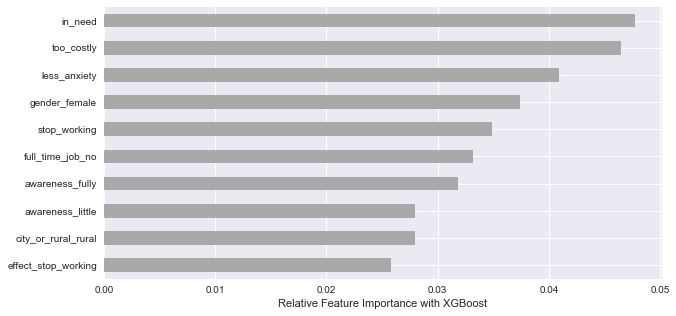

In [167]:
# plot the important features - based on XGBoost
feat_importances = pd.Series(booster.feature_importances_, index=features.columns)
feat_importances.nlargest(10).sort_values().plot(kind='barh', color='darkgrey', figsize=(10,5))
plt.xlabel('Relative Feature Importance with XGBoost');

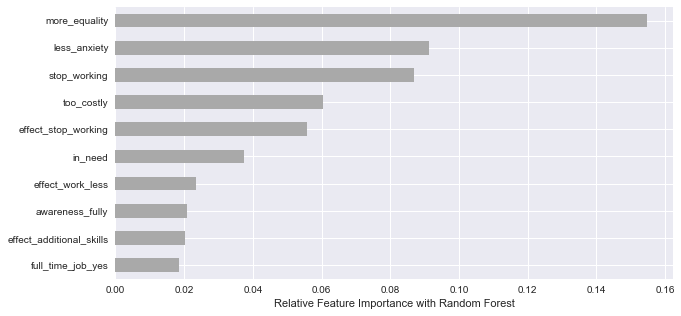

In [168]:
# plot the important features - based on Random Forest
feat_importances = pd.Series(forest.feature_importances_, index=features.columns)
feat_importances.nlargest(10).sort_values().plot(kind='barh', color='darkgrey', figsize=(10,5))
plt.xlabel('Relative Feature Importance with Random Forest');

This last plot, produced by our tuned Random Forest, draws the most distinct picture. We see that the attitude towards the argument **"It creates more equality of opportunity"** is the first and most important feature to split people.

#### 5.2. Recommendation 
<a id='5.2. Recommendation'></a>

Back to our question from the beginning: "Could we predict the vote someone would give?" The answer is: "YES."

With an XGBoost and the SMOTE algorithm to account for the imbalanced classes in our target variable we were able to not only improve our accuracy by just under 4& to almost 84% - moreover, we could remove any bias towards the yes-voters. So let's take the **XGBoost**.

*Back to: <a href='#Table of contents'> Table of contents</a>*